In [1]:
path = r"/home/kchen/Documents/AL/Data/Raw/Joined"

In [1]:
import os
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from scipy import stats
from scipy.stats import randint

import matplotlib as mpl
import matplotlib.pyplot as plt

import lightgbm as lgb
import catboost as cb

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [2]:
#Open csv file
data = pd.read_csv(r'/home/kchen/Documents/AL/Data/data7.csv', low_memory=False, index_col='CASEID')
data.head()

,AGE,HEIGHT,WEIGHT,BMI,PRSODM,PRBUN,PRCREAT,PRALBUM,PRWBC,PRHCT,...,COL_APPROACH_9,COL_APPROACH_10,COL_APPROACH_11,OPERYR_0,OPERYR_1,OPERYR_2,OPERYR_3,OPERYR_4,OPERYR_5,OPERYR_6
CASEID,,,,,,,,,,,,,,,,,,,,,
8080841,0.698630,0.565217,0.220459,0.163738,0.560606,0.060302,0.032886,0.235294,0.062205,0.363462,...,0,0,0,0,0,0,0,0,0,1
8080850,0.452055,0.652174,0.250441,0.160112,0.500000,0.095477,0.059060,0.200000,0.029218,0.350000,...,0,0,0,0,0,0,0,0,0,1
8080874,0.164384,0.456522,0.292769,0.286363,0.545455,0.030151,0.027517,0.305882,0.101037,0.536538,...,0,0,0,0,0,0,0,0,0,1
8080921,0.657534,0.695652,0.294533,0.180788,0.515152,0.050251,0.061745,0.152941,0.074741,0.269231,...,0,0,0,0,0,0,0,0,0,1
8080981,0.712329,0.565217,0.213404,0.157164,0.590909,0.055276,0.046980,0.364706,0.095193,0.653846,...,0,0,0,0,0,0,0,0,0,1


In [3]:
y = data['COL_ANASTOMOTIC']
X = data.drop('COL_ANASTOMOTIC', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [6]:
def score(X, y):
    preds = cross_val_predict(RandomForestClassifier(), X, y, cv=5, method='predict_proba')
    rfpreds = preds[:, 1]
    score = roc_auc_score(y, rfpreds)
    print('rf AUC:', score)
    preds2 = cross_val_predict(XGBClassifier(), X, y, cv=5, method='predict_proba')
    xgbpreds = preds2[:, 1]
    score2 = roc_auc_score(y, xgbpreds)
    print('xgb AUC:', score2)
    preds3 = cross_val_predict(LogisticRegression(), X, y, cv=5, method='predict_proba')
    lrpreds = preds3[:, 1]
    score3 = roc_auc_score(y, lrpreds)
    print('lr AUC:', score3)

In [5]:
score(X, y)

KeyboardInterrupt: 

In [15]:
def evaluate(model, X, y):
    ppreds = model.predict_proba(X)
    ppreds = ppreds[:,1]
    pscore = score = roc_auc_score(y, ppreds)
    print('AUC', pscore)

In [45]:
# Define model, predict, score
model1 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 10, bootstrap = True)
model1.fit(X_train, y_train)
preds = model1.predict_proba(X_valid)
ppreds = preds[:, 1]
score = roc_auc_score(y_valid, ppreds)
print('AUC:', score)


AUC: 0.6497116318625895


In [46]:
rf_probas = cross_val_predict(model1, X, y, cv=5, method='predict_proba')
rf_scores = rf_probas[:, 1]
score = roc_auc_score(y, rf_scores)
print('AUC:', score)

In [47]:
fpr, tpr, thresholds = roc_curve(y, rf_scores)

In [39]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

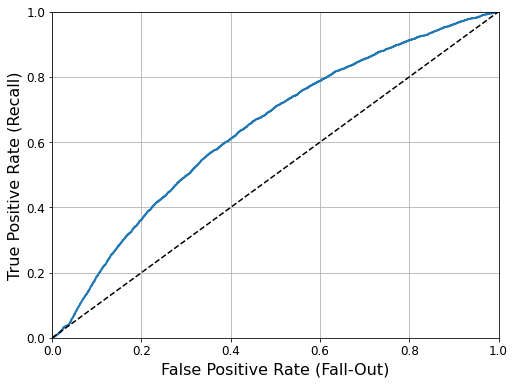

In [48]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
plt.show()

In [56]:
precisions, recalls, thresholds = precision_recall_curve(y, rf_scores)

In [59]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([0, 1, 0, 1])  

<function matplotlib.pyplot.show(close=None, block=None)>

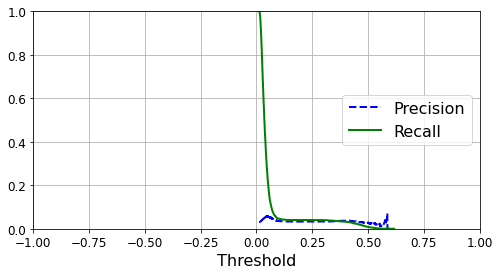

In [60]:
plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show

In [50]:
scores = cross_val_score(model1, X, y, cv=5, scoring='roc_auc', n_jobs=6)
print('Cross-val score %s' % mean(scores))

Cross-val score 0.6406657705397434


In [6]:
dfpreds = pd.DataFrame(preds)
dfpreds.describe()

,0
count,29357.000000
mean,0.388868
std,0.487502
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
ppreds = model1.predict_proba(X_valid)
ppreds = ppreds[:,1]
pscore = score = roc_auc_score(y_valid, ppreds)
print(pscore)

0.6486000532346977


In [16]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
brf = BalancedRandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = brf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = 6)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   7.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   7.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   8.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  25.7s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  25.9s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  26.4s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=6

RandomizedSearchCV(cv=3, estimator=BalancedRandomForestClassifier(), n_jobs=6,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [17]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [20]:
model1 = rf_random.best_estimator_
evaluate(model1, X_valid, y_valid)

AUC: 0.6146780274596905
p_AUC 0.6542693659471597


In [18]:
def evaluate(model, X, y):
    predictions = model.predict(X)
    preds = model1.predict(X_valid)
    score = roc_auc_score(y_valid, preds)
    print('AUC:', score)
    ppreds = model1.predict_proba(X)
    ppreds = ppreds[:,1]
    pscore = score = roc_auc_score(y, ppreds)
    print('p_AUC', pscore)


AUC: 0.6028150483778429
p_AUC 0.6486000532346977


In [51]:
clf_xgb = xgb.XGBClassifier(use_label_encoder=False)
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = 3,  
                         n_iter = 10, 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = 6)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[14:51:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. E

KeyboardInterrupt: 

In [43]:
model2 = XGBClassifier(use_label_encoder=False)
model2.fit(X_train, y_train)
evaluate(model2, X_valid, y_valid)

[14:40:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC: 0.5
p_AUC 0.6215011576112227


In [13]:
# easy ensemble for imbalanced classification

# define model
model = EasyEnsembleClassifier(n_estimators=100)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.650


In [15]:
print(scores)

[0.65025184 0.64542783 0.64680218 0.6509836  0.65676741 0.6473942
 0.65381518 0.65709331 0.64339537 0.64639817 0.65557017 0.66245976
 0.65233398 0.64206778 0.64352864]


In [20]:
scores = cross_val_score(model1, X, y, cv=5, scoring='roc_auc', n_jobs=6)
print(mean(scores))

[0.61731439 0.62842542 0.64955505 0.61668861 0.61902814]
0.6262023189234257


In [21]:
scores2 = cross_val_score(model2, X, y, cv=5, scoring='roc_auc', n_jobs=6)
print(scores2)
print((scores2.sum()) / 5)

/home/kchen/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kchen/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kchen/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning:

[12:56:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:56:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:56:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.[12:56:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old beh

In [24]:
D_train = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
D_test = xgb.DMatrix(X_valid, label=y_valid, enable_categorical=True)

In [25]:
param = {'eta': 0.3, 'max_depth': 3, 'objective': 'binary:logistic',} 
steps = 60
model3 = xgb.train(param, D_train, steps)
preds3 = model3.predict(D_test)
score3 = roc_auc_score(y_valid, preds3)
print(score3)

[13:08:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6597962190380587


In [26]:
dfpreds3 = pd.DataFrame(preds3)

In [29]:
dfpreds3.describe()

,0
count,29357.000000
mean,0.031213
std,0.020253
min,0.006468
25%,0.018366
50%,0.025716
75%,0.037559
max,0.361602


In [10]:
def rf_feat_importance(model, X):
    return pd.DataFrame({'cols':X.columns, 'imp':model.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [11]:
fi = rf_feat_importance(model1, X)
fi[:10]

,cols,imp
3,BMI,0.056005
8,PRWBC,0.055299
10,PRPLATE,0.055247
9,PRHCT,0.054991
2,WEIGHT,0.053555
0,AGE,0.053017
6,PRCREAT,0.051717
5,PRBUN,0.046241
1,HEIGHT,0.041980
7,PRALBUM,0.041527


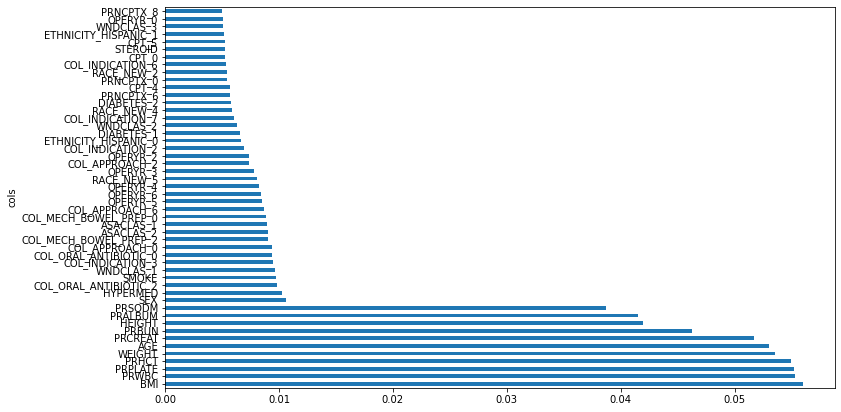

In [12]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:50]);